In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('^GDAXI', start='2019-1-1')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200
...,...,...,...,...,...,...
2021-07-26,15586.660156,15641.610352,15544.940430,15618.980469,15618.980469,38643700
2021-07-27,15537.889648,15586.900391,15423.559570,15519.129883,15519.129883,44081200
2021-07-28,15538.750000,15577.129883,15497.099609,15570.360352,15570.360352,56569500


In [4]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2019-01-02,10477.769531,10612.719727,10386.969727,10580.190430,10580.190430,79626700,NaN,NaN
2019-01-03,10467.110352,10538.660156,10400.110352,10416.660156,10416.660156,84733800,NaN,NaN
2019-01-04,10533.940430,10786.339844,10483.900391,10767.690430,10767.690430,95339500,NaN,NaN
2019-01-07,10814.389648,10814.469727,10681.269531,10747.809570,10747.809570,71151400,NaN,NaN
2019-01-08,10750.190430,10910.709961,10745.030273,10803.980469,10803.980469,93672200,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-07-26,15586.660156,15641.610352,15544.940430,15618.980469,15618.980469,38643700,15578.201904,15558.560332
2021-07-27,15537.889648,15586.900391,15423.559570,15519.129883,15519.129883,44081200,15569.628906,15561.010527
2021-07-28,15538.750000,15577.129883,15497.099609,15570.360352,15570.360352,56569500,15571.594922,15564.686133


In [6]:
df = df.dropna()

In [7]:
df = df[['Adj Close','MA20','MA50']]

In [8]:
df

,Adj Close,MA20,MA50
Date,,,
2019-03-12,11524.169922,11447.165967,11187.565020
2019-03-13,11572.410156,11467.425488,11207.409414
2019-03-14,11587.469727,11492.309473,11230.825605
2019-03-15,11685.690430,11511.604004,11249.185605
2019-03-18,11657.059570,11529.496973,11267.370605
...,...,...,...
2021-07-26,15618.980469,15578.201904,15558.560332
2021-07-27,15519.129883,15569.628906,15561.010527
2021-07-28,15570.360352,15571.594922,15564.686133


In [9]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)

In [10]:
Buy

[0, 75, 132, 288, 432]

In [11]:
Sell

[59, 102, 243, 398, 601]

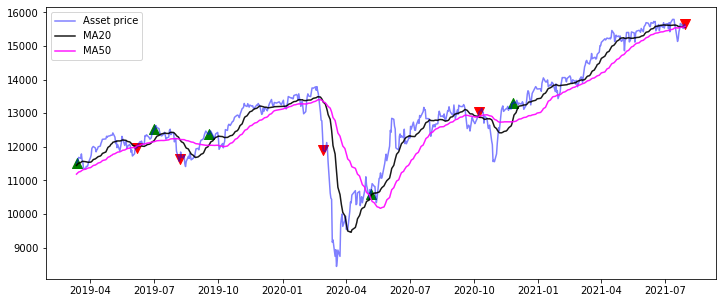

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Asset price', c='blue', alpha=0.5)
plt.plot(df['MA20'], label='MA20', c='k', alpha=0.9)
plt.plot(df['MA50'], label='MA50', c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker='^', color='g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker='v', color='r', s=100)
plt.legend()
plt.show()